In [0]:
#importing all necessary libraries 
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
#from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import pandas as pd
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for normal, 1 for potholes
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'normal_new': #Folder contain normal road Images get the '0' class label.
            label = 0
        elif labels == 'potholes_new':
            label = 1
               
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(125,125)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state= 36) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'normal', 1:'potholes'}
    
    return labels[class_code]

In [0]:
Images, Labels = get_images('/content/drive/My Drive/Road_images/') #Extract the training images from the folders.

road_images = np.array(Images) #converting the list of images to numpy array.
road_labels = np.array(Labels)

In [33]:
#shapes of images and labels
print("Shape of Images:",road_images.shape)
print("Shape of Labels:",road_labels.shape)

Shape of Images: (200, 125, 125, 3)
Shape of Labels: (200,)


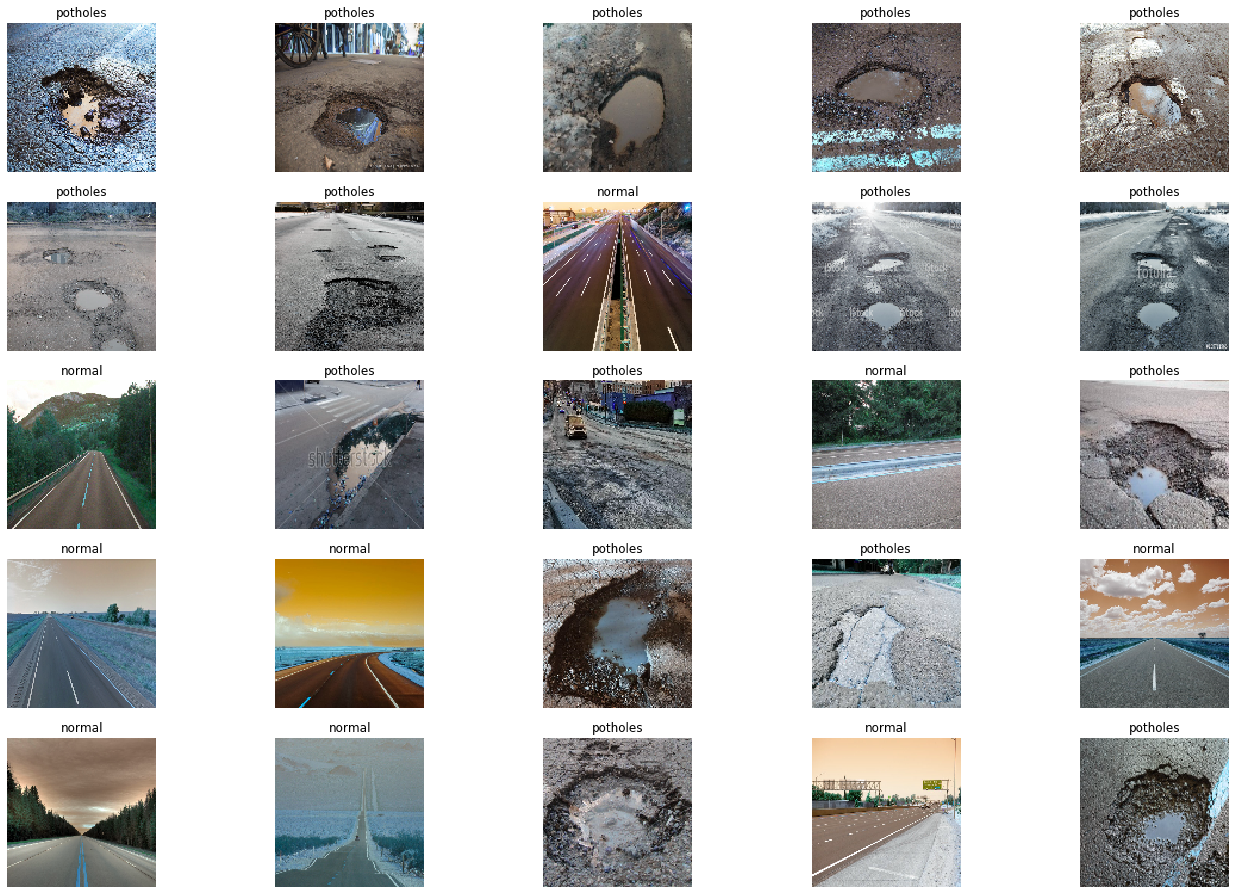

In [34]:
#plotting of iamges and their respective labels in matrix form
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [0]:
#splitting the data into train and test dataset, if it is needed in future
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Images, Labels, test_size = 0.20, random_state = 11)

In [36]:
#creating model
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(125,125,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(2,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 123, 123, 200)     5600      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 121, 121, 180)     324180    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 180)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 22, 22, 180)       291780    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 20, 20, 140)       226940    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 18, 18, 100)       126100    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 50)       

TypeError: ignored

In [11]:
#Training of model 
trained = model.fit(road_images, road_labels, epochs=35,validation_split= 0.30)

Train on 140 samples, validate on 60 samples
Epoch 1/35
140/140 [==============================] - 102s 729ms/sample - loss: 1.8001 - acc: 0.5143 - val_loss: 0.9426 - val_acc: 0.4500
Epoch 2/35
140/140 [==============================] - 102s 727ms/sample - loss: 0.8065 - acc: 0.5714 - val_loss: 0.6019 - val_acc: 0.7000
Epoch 3/35
140/140 [==============================] - 102s 729ms/sample - loss: 0.7794 - acc: 0.5429 - val_loss: 0.6208 - val_acc: 0.7000
Epoch 4/35
140/140 [==============================] - 101s 722ms/sample - loss: 0.7021 - acc: 0.6143 - val_loss: 0.6135 - val_acc: 0.8000
Epoch 5/35
140/140 [==============================] - 100s 718ms/sample - loss: 0.6420 - acc: 0.6500 - val_loss: 0.5491 - val_acc: 0.8000
Epoch 6/35
140/140 [==============================] - 101s 722ms/sample - loss: 0.5757 - acc: 0.6643 - val_loss: 0.4946 - val_acc: 0.8667
Epoch 7/35
140/140 [==============================] - 101s 720ms/sample - loss: 0.4576 - acc: 0.8071 - val_loss: 0.5554 - val_a

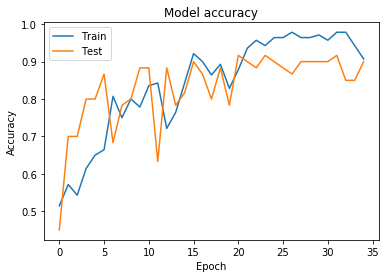

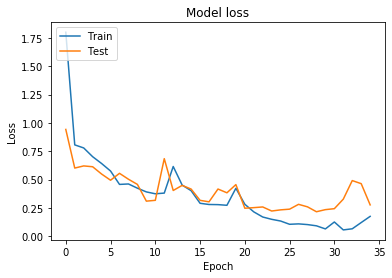

In [12]:
#graph for accuracy per epoch value
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

#graph for loss per epoch value
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [13]:
#extract the images and labels from dataset used for prediction
pred_images,pred_labels = get_images('/content/drive/My Drive/pre_data/')
pred_images = np.array(pred_images)
pred_labels =np.array(pred_labels)
pred_images.shape

(40, 125, 125, 3)

In [14]:
pred_labels.shape

(40,)

In [0]:

prediction = model.predict(pred_images)
y_pred = np.argmax(prediction, axis=1)

In [16]:
pd.DataFrame(confusion_matrix(pred_labels, y_pred),columns=['00', '11'],index=['0', '1'])


,00,11
0,14,6
1,1,19


In [17]:
print(pred_labels)

[1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1
 1 1 0]


In [18]:
print(y_pred)

[1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1
 1 1 1]
